# Analysis for Figure 1C SEC elutions

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from scipy.optimize import curve_fit
from sklearn.metrics import r2_score
from scipy.stats import ttest_ind



In [2]:
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['font.size'] = 7
cm = 1/2.54
fig_folder = './Figure_1_exports'
data_folder = '../all_data/Figure_1_data'

### Uses data from eCM349

In [3]:
df = pd.read_excel('/'.join([data_folder,'Fig1C-SEC all elution data.xlsx']))
df

,Fluorphore,DNA_name,rep,volume,rep1,rep2,rep3
0,GFP,Blank,1,0,4889,4366,4363
1,GFP,Blank,1,250,56,64,78
2,GFP,Blank,1,500,128,151,131
3,GFP,Blank,1,750,104,92,120
4,GFP,Blank,1,900,129,136,153
...,...,...,...,...,...,...,...
397,Cy5,Cat,3,2100,48,48,54
398,Cy5,Cat,3,2600,30,35,37
399,Cy5,Cat,3,3100,11,16,14
400,Cy5,Cat,3,3600,6,7,6


## Notes about the data:
* The 0 volume samples are for the samples measured prior to SEC
* rep indicates biological replicate
* sub_rep indicates technical replicate measurements as there is variance in the split GFP binding

In [4]:
data = df.set_index(['Fluorphore', 'DNA_name', 'rep', 'volume']).stack().reset_index().rename(columns={'level_4':'sub_rep',0:'AU'})
data = data.set_index(['DNA_name', 'rep', 'volume','sub_rep','Fluorphore']).unstack().reset_index()
data.columns = data.columns.droplevel()
data.columns = ['DNA_name', 'rep', 'volume','sub_rep','Cy5','GFP']
data = data[data['DNA_name'] != 'MscL']
data

,DNA_name,rep,volume,sub_rep,Cy5,GFP
0,AqpZ,1,0,rep1,1302,38239
1,AqpZ,1,0,rep2,1236,33528
2,AqpZ,1,0,rep3,1232,31119
3,AqpZ,1,250,rep1,1,54
4,AqpZ,1,250,rep2,1,54
...,...,...,...,...,...,...
445,Cat,3,3600,rep2,7,3454
446,Cat,3,3600,rep3,6,3609
447,Cat,3,4100,rep1,4,217
448,Cat,3,4100,rep2,2,142


## Statistical analysis

### Liposome Peak

In [5]:
t = data[data['volume'] == 1200]
aqpz = t[t['DNA_name'] == 'AqpZ']
cat = t[t['DNA_name'] == 'Cat']

blank = t[t['DNA_name'] == 'Blank']

cy5 = ttest_ind(aqpz['Cy5'],blank['Cy5'])[1]
gfp = ttest_ind(aqpz['GFP'],blank['GFP'])[1]
fold_diff = aqpz['GFP'].mean() / blank['GFP'].mean()
print(f'AqpZ:Blank - Cy5:{cy5}   GFP:{gfp}   diff:{fold_diff}')

cy5 = ttest_ind(aqpz['Cy5'],cat['Cy5'])[1]
gfp = ttest_ind(aqpz['GFP'],cat['GFP'])[1]
fold_diff = aqpz['GFP'].mean() / cat['GFP'].mean()

print(f'AqpZ:Cat - Cy5:{cy5}   GFP:{gfp}   diff:{fold_diff}')

cy5 = ttest_ind(cat['Cy5'],blank['Cy5'])[1]
gfp = ttest_ind(cat['GFP'],blank['GFP'])[1]
fold_diff = cat['GFP'].mean() / blank['GFP'].mean()
print(f'Cat:Blank - Cy5:{cy5}   GFP:{gfp}   diff:{fold_diff}')

AqpZ:Blank - Cy5:0.007425606589881421   GFP:1.2365274101079134e-11   diff:8.326968461703496
AqpZ:Cat - Cy5:0.06991132717484812   GFP:2.9956088697918486e-14   diff:12.625894599869877
Cat:Blank - Cy5:0.5903481991867223   GFP:0.3128308847674981   diff:0.6595151255095473


### Free protein peak

In [6]:
t = data[data['volume'] == 3100]
aqpz = t[t['DNA_name'] == 'AqpZ']
cat = t[t['DNA_name'] == 'Cat']

blank = t[t['DNA_name'] == 'Blank']

cy5 = ttest_ind(aqpz['Cy5'],blank['Cy5'])[1]
gfp = ttest_ind(aqpz['GFP'],blank['GFP'])[1]
fold_diff = aqpz['GFP'].mean() / blank['GFP'].mean()
print(f'AqpZ:Blank - Cy5:{cy5}   GFP:{gfp}   diff:{fold_diff}')

cy5 = ttest_ind(aqpz['Cy5'],cat['Cy5'])[1]
gfp = ttest_ind(aqpz['GFP'],cat['GFP'])[1]
fold_diff = aqpz['GFP'].mean() / cat['GFP'].mean()

print(f'AqpZ:Cat - Cy5:{cy5}   GFP:{gfp}   diff:{fold_diff}')

cy5 = ttest_ind(cat['Cy5'],blank['Cy5'])[1]
gfp = ttest_ind(cat['GFP'],blank['GFP'])[1]
fold_diff = cat['GFP'].mean() / blank['GFP'].mean()
print(f'Cat:Blank - Cy5:{cy5}   GFP:{gfp}   diff:{fold_diff}')

AqpZ:Blank - Cy5:0.009974761597718788   GFP:8.754821322795989e-07   diff:1.498691480081419
AqpZ:Cat - Cy5:0.035944098621407156   GFP:1.602776416895114e-11   diff:0.12928309837957155
Cat:Blank - Cy5:0.9375771502779789   GFP:7.892719811511504e-12   diff:11.592323349810993


## Plotting

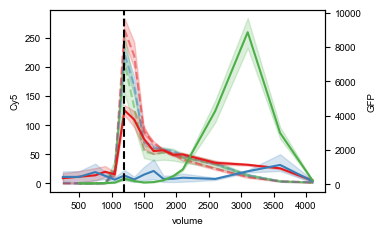

In [8]:
t = data[data['volume'] != 0]
fig,ax = plt.subplots(figsize=[9*cm,6*cm])

sns.lineplot(data=t,x='volume',y='Cy5',hue='DNA_name',palette='Set1',ls='--',alpha=0.5,ax=ax,hue_order=['AqpZ','Blank','Cat'])
ax2 = plt.twinx()
sns.lineplot(data=t,x='volume',y='GFP',hue='DNA_name',palette='Set1', ax=ax2,hue_order=['AqpZ','Blank','Cat'])
ax.get_legend().remove()
ax2.get_legend().remove()
plt.axvline(1200,color='k',ls='--')
# plt.savefig(f'{fig_folder}/all_profiles.svg',format='svg',dpi=300)

plt.show()

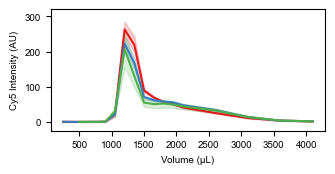

In [9]:
t = data[data['volume'] != 0]

fig,ax = plt.subplots(figsize=[9*cm,4*cm])
sns.lineplot(data=t,x='volume',y='Cy5',hue='DNA_name',palette='Set1',ax=ax,hue_order=['AqpZ','Blank','Cat'])
ax.get_legend().remove()

plt.ylim([-25,320])
plt.xlabel('Volume (μL)')
plt.ylabel('Cy5 Intensity (AU)')
# plt.savefig(f'{fig_folder}/Fig1C-all_Cy5_profiles.svg',format='svg',dpi=300)

plt.show()

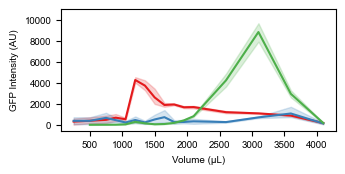

In [10]:
t = data[data['volume'] != 0]
fig,ax = plt.subplots(figsize=[9*cm,4*cm])

sns.lineplot(data=t,x='volume',y='GFP',hue='DNA_name',palette='Set1',ax=ax,hue_order=['AqpZ','Blank','Cat'])
ax.get_legend().remove()

plt.ylim([-500,11000])
plt.xlabel('Volume (μL)')
plt.ylabel('GFP Intensity (AU)')

# plt.savefig(f'{fig_folder}/Fig1C-all_GFP_profiles.svg',format='svg',dpi=300)
plt.show()

### Data export

In [10]:
export = data[data['volume'] != 0].copy()
export = export.rename(columns={
    'rep':'Biological_rep',
    'sub_rep':'Technical_rep',
    'volume':'Elution_volume',
})

# export.to_excel(f'./{data_folder}/Fig1C-SEC_data.xlsx')

### Calibration Curve

R2 score for fit: 0.995


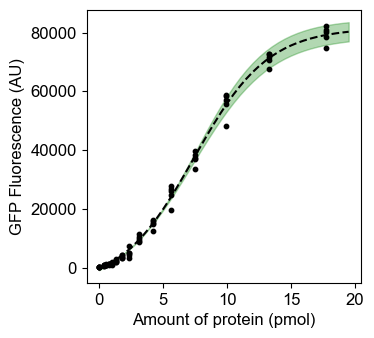

In [12]:
def sigmoid(x, L ,x0, k, b):
    y = L / (1 + np.exp(-k*(x-x0))) + b
    return (y)

plt.rcParams['font.size'] = 12


df = pd.read_excel('/'.join([data_folder,'sample_calibration_curve.xlsx']))
cutoff = 20
df = df[df['Cat pmol'] < cutoff]
xdata=np.array(df['Cat pmol'])
ydata=np.array(df['GFP'])

p0 = [max(ydata), np.median(xdata),1,min(ydata)] # this is a mandatory initial guess

popt, pcov = curve_fit(sigmoid, xdata, ydata,p0, method='dogbox')
sigma_ab = np.sqrt(np.diagonal(pcov))

x_fit = np.arange(0,cutoff,0.5)

bound_upper = sigmoid(x_fit, *(popt + sigma_ab))
bound_lower = sigmoid(x_fit, *(popt - sigma_ab))

fig,ax = plt.subplots(figsize=[9*cm,9*cm])

plt.fill_between(x_fit, bound_lower, bound_upper,
                 color = 'green', alpha = 0.3)

y_fit = sigmoid(x_fit,*popt)
y_pred = sigmoid(xdata, *popt)
score = round(r2_score(ydata, y_pred),3)
print(f'R2 score for fit: {score}')
plt.scatter(xdata,ydata,color='black',s=10)
plt.plot(x_fit,y_fit,color='black',ls='--')
plt.xlabel('Amount of protein (pmol)')
plt.ylabel('GFP Fluorescence (AU)')

# plt.savefig(f'{fig_folder}/Supp_fig-calibration_curve.svg',format='svg',dpi=300)

plt.show()

plt.rcParams['font.size'] = 7


R2 score for fit: 0.995


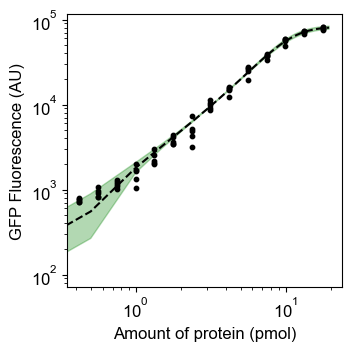

In [13]:
plt.rcParams['font.size'] = 12

fig,ax = plt.subplots(figsize=[9*cm,9*cm])


plt.fill_between(x_fit, bound_lower, bound_upper,
                 color = 'green', alpha = 0.3)
plt.xscale('log')
plt.yscale('log')

y_fit = sigmoid(x_fit,*popt)
y_pred = sigmoid(xdata, *popt)
score = round(r2_score(ydata, y_pred),3)
print(f'R2 score for fit: {score}')
plt.scatter(xdata,ydata,color='black',s=10)
plt.plot(x_fit,y_fit,color='black',ls='--')
plt.xlabel('Amount of protein (pmol)')
plt.ylabel('GFP Fluorescence (AU)')

# plt.savefig(f'{fig_folder}/Supp_fig-calibration_curve_log.png',format='png',dpi=300,bbox_inches='tight') # Can't render the svg file in illustrator so I switched to png for this figure
# plt.savefig(f'{fig_folder}/Supp_fig-calibration_curve_log.svg',format='svg',dpi=300,bbox_inches='tight')

plt.show()

plt.rcParams['font.size'] = 7


In [28]:
# df.to_excel(f'./{data_folder}/Supp_Fig_1C-calibration_curve.xlsx')